# Étude à réaliser sur MNIST

In [2]:
from principal_RBM_MNIST import *
from principal_DNN_MNIST import *

/Users/zakariatozy/opt/anaconda3/envs/tensorflow/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelBinarizer
import numpy as np

def download_mnist():
    if os.path.exists('mnist_784.npz'):
        return
    mnist = fetch_openml('mnist_784')
    X = mnist['data'].values
    X[X < 127] = 0 
    X[X >= 127] = 1
    y = mnist['target']
    y = LabelBinarizer().fit_transform(y)

    np.savez('mnist_784.npz', X=X, y=y)

def get_mnist(train_size, test_size):
    download_mnist()
    with np.load('mnist_784.npz') as data:
        X, y = data['X'], data['y']

    X_train, X_test = X[:train_size], X[train_size:train_size+test_size]
    y_train, y_test = y[:train_size], y[train_size:train_size+test_size]

    return X_train, X_test, y_train, y_test


## PROGRAMME

In [9]:
# GET THE DATA READY
X_train, X_test, y_train, y_test = get_mnist(50000,20000)
# Number of epoch for pretraining
num_epochs_pretraining= 100
# Number of epoch for tuning
num_epochs_training = 200
# Learning rate
learning_rate=0.1
# Batch size
batch_size = 100
# Number of features
p = 28*28
# Number of classes 
nbr_classes = y_train.shape[1]

In [10]:
X_train.shape, X_test.shape

((50000, 784), (20000, 784))

Pretraining ================================


Training RMB: 100%|██████████| 100/100 [08:49<00:00,  5.29s/it, loss pretraining=0.103]


Fine Tuning ===================================


Retropopagation: 100%|██████████| 200/200 [17:55<00:00,  5.38s/it, loss retropagation=0.0143]


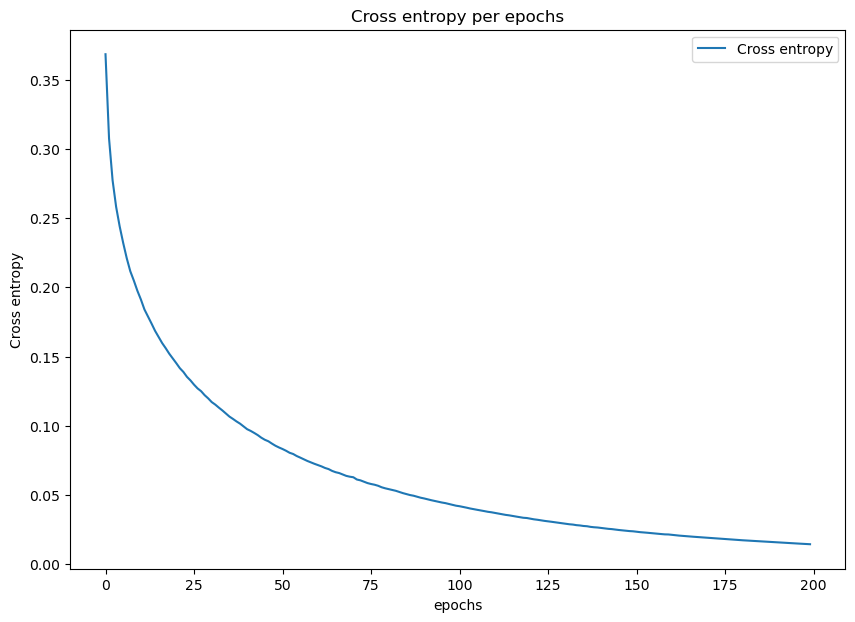

In [5]:
hidden_units = [200, 200]

dnn = init_DNN(p, hidden_units, nbr_classes)
print("Pretraining ================================")
dnn_pretrain = pretrain_DNN(dnn, X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
print("Fine Tuning ===================================")
dnn_fine_tune, loss = retropropagation(dnn, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train, display=True)

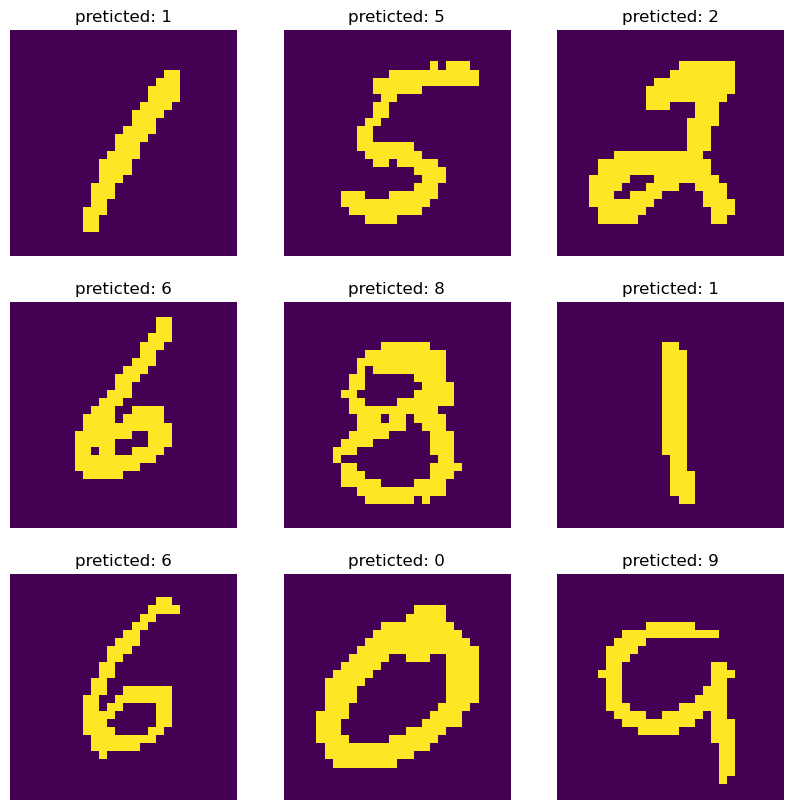

 ====================  Observerd Probaility for each sample ====================


,0,1,2,3,4,5,6,7,8,9
sample_[1],8.494780e-09,9.992194e-01,9.411408e-05,1.839022e-04,6.672546e-05,9.069131e-10,5.410257e-09,4.355886e-04,2.044033e-07,6.699483e-08
sample_[2],9.343721e-11,1.243454e-09,2.034501e-08,1.576338e-07,3.029051e-10,9.999965e-01,3.089195e-06,1.483585e-13,2.088246e-07,1.120618e-09
sample_[3],3.543038e-07,6.040489e-07,9.999823e-01,1.359489e-05,8.745320e-08,1.977670e-09,9.184983e-08,3.033762e-10,2.956824e-06,1.151734e-08
sample_[4],4.338031e-06,1.714016e-07,2.544239e-05,1.951672e-08,1.721814e-06,6.713264e-08,9.999665e-01,1.030836e-11,1.700701e-06,6.687951e-10
sample_[5],4.354567e-06,4.441967e-10,6.436220e-05,9.059755e-04,1.108206e-08,6.129670e-06,1.253844e-10,2.711662e-08,9.915793e-01,7.439808e-03
sample_[6],6.271125e-10,9.998840e-01,4.720171e-07,4.066027e-05,3.205068e-08,2.731331e-06,2.379974e-08,7.148953e-05,6.077236e-07,2.372373e-08
sample_[7],7.533775e-07,2.446960e-08,1.116253e-06,1.411097e-09,5.398255e-07,5.496429e-07,9.999938e-01,2.152953e-12,3.171291e-06,1.360030e-09
sample_[8],9.999945e-01,1.392527e-09,1.374477e-06,1.710732e-09,1.068966e-10,2.611476e-07,5.128078e-09,7.512072e-08,3.385548e-09,3.755118e-06
sample_[9],4.077071e-06,5.154990e-10,9.800032e-06,1.316567e-09,8.153278e-05,2.616914e-08,5.156512e-07,2.884837e-06,5.275815e-07,9.999006e-01


In [6]:
# Output probability of random images 
random_samples = np.random.randint(0, len(X_test), size=9)
output_proba = entree_sortie_reseau(dnn_fine_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

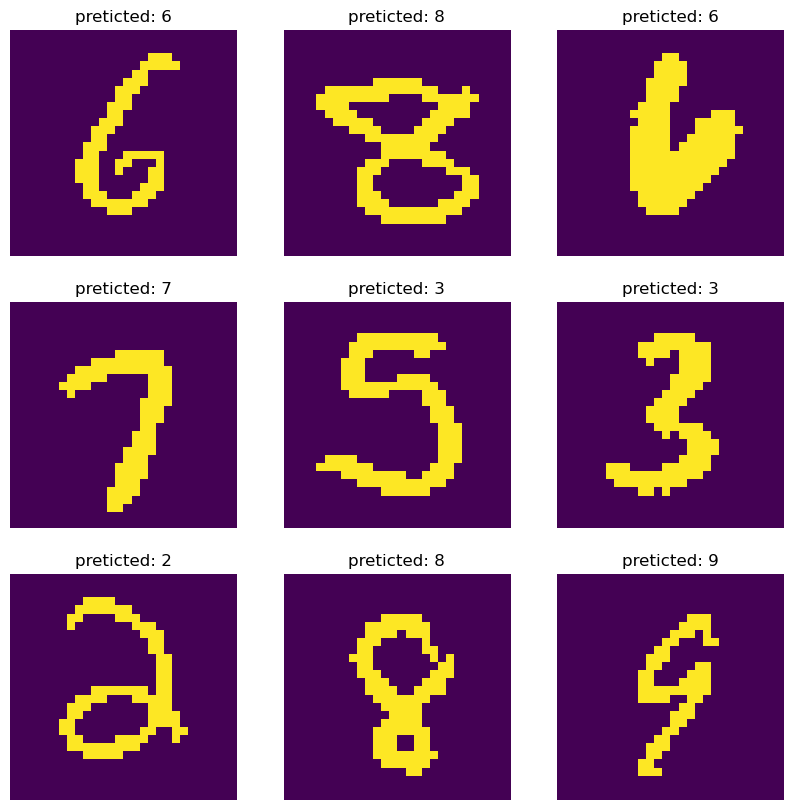

 ====================  Observerd Probaility for each sample ====================


,0,1,2,3,4,5,6,7,8,9
sample_[1],6.262365e-07,2.795503e-09,3.866943e-06,4.075785e-10,1.244757e-06,8.178909e-07,9.999930e-01,1.490057e-14,4.799973e-07,1.875735e-10
sample_[2],3.856619e-06,3.262721e-10,9.023697e-04,9.411523e-04,3.969154e-08,1.719003e-06,3.107052e-07,1.038637e-06,9.981462e-01,3.299295e-06
sample_[3],3.235814e-04,2.268047e-09,2.256967e-05,6.843351e-10,3.301293e-04,1.430116e-08,9.993217e-01,4.419230e-08,1.914731e-06,3.718208e-08
sample_[4],8.448210e-08,2.055997e-07,1.793880e-05,1.425765e-05,5.760154e-10,6.773233e-10,1.313205e-13,9.998686e-01,2.569821e-09,9.887199e-05
sample_[5],9.376410e-04,3.805227e-05,1.541082e-04,8.284353e-01,2.962871e-07,1.673636e-01,3.311537e-07,2.836488e-03,2.339570e-04,2.347833e-07
sample_[6],6.455721e-09,4.606955e-05,2.372202e-04,9.994709e-01,2.783175e-07,2.101439e-04,3.842925e-09,2.352852e-08,3.529738e-05,1.048005e-07
sample_[7],7.697485e-07,1.262706e-07,9.999242e-01,7.357447e-05,4.454801e-07,2.932444e-08,4.063772e-07,6.012491e-08,3.709227e-07,3.760114e-10
sample_[8],8.898323e-09,1.618583e-11,2.837896e-06,2.885183e-08,4.990052e-09,7.565017e-09,1.559951e-07,1.275330e-08,9.999464e-01,5.053458e-05
sample_[9],1.503059e-07,2.210590e-06,7.321355e-07,2.984586e-05,1.329508e-03,5.078879e-05,3.797072e-09,3.920715e-05,2.586336e-04,9.982889e-01


In [7]:
# Output probability of random images 
random_samples = np.random.randint(0, len(X_test), size=9)
output_proba = entree_sortie_reseau(dnn_fine_tune, X_test[random_samples, :])[-1]

output_label = output_proba.argmax(axis=1)

plt.figure(figsize=(10,10))
for i,j in enumerate(random_samples):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[j].reshape(28,28))
    plt.title(f"preticted: {output_label[i]}")
    plt.axis('off')

plt.show()

import pandas as pd
print(" ====================  Observerd Probaility for each sample ====================")
pd.DataFrame(output_proba, index=[f"sample_[{i+1}]" for i in range(len(output_proba))])

## TAUX D'ERREUR EN FONCTION DU NOMBRE DE COUCHES

In [6]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=10000, test_size=5000)

# Set number of epochs for pretraining and training
num_epochs_pretraining = 100
num_epochs_training = 200

# Set learning rate
learning_rate = 0.1

# Set batch size
batch_size = 100

# Set input dimension
input_dim = 28*28

# Set number of classes
num_classes = y_train.shape[1]

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (200, 200, 200), (200, 200, 200, 200), (200, 200, 200, 200, 200), (200, 200, 200, 200, 200, 200), (200, 200, 200, 200, 200, 200, 200)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

hidden_units : (200, 200)


Training RMB:   2%|▏         | 2/100 [00:05<04:52,  2.98s/it, loss pretraining=0.0896]


KeyboardInterrupt: 

In [9]:
import pandas as pd

df = pd.DataFrame(result, index=[f"hidden_units_{i+1}" for i in range(len(hidden_layer_units))])
df.head()
#df.to_csv("result_couches.csv")

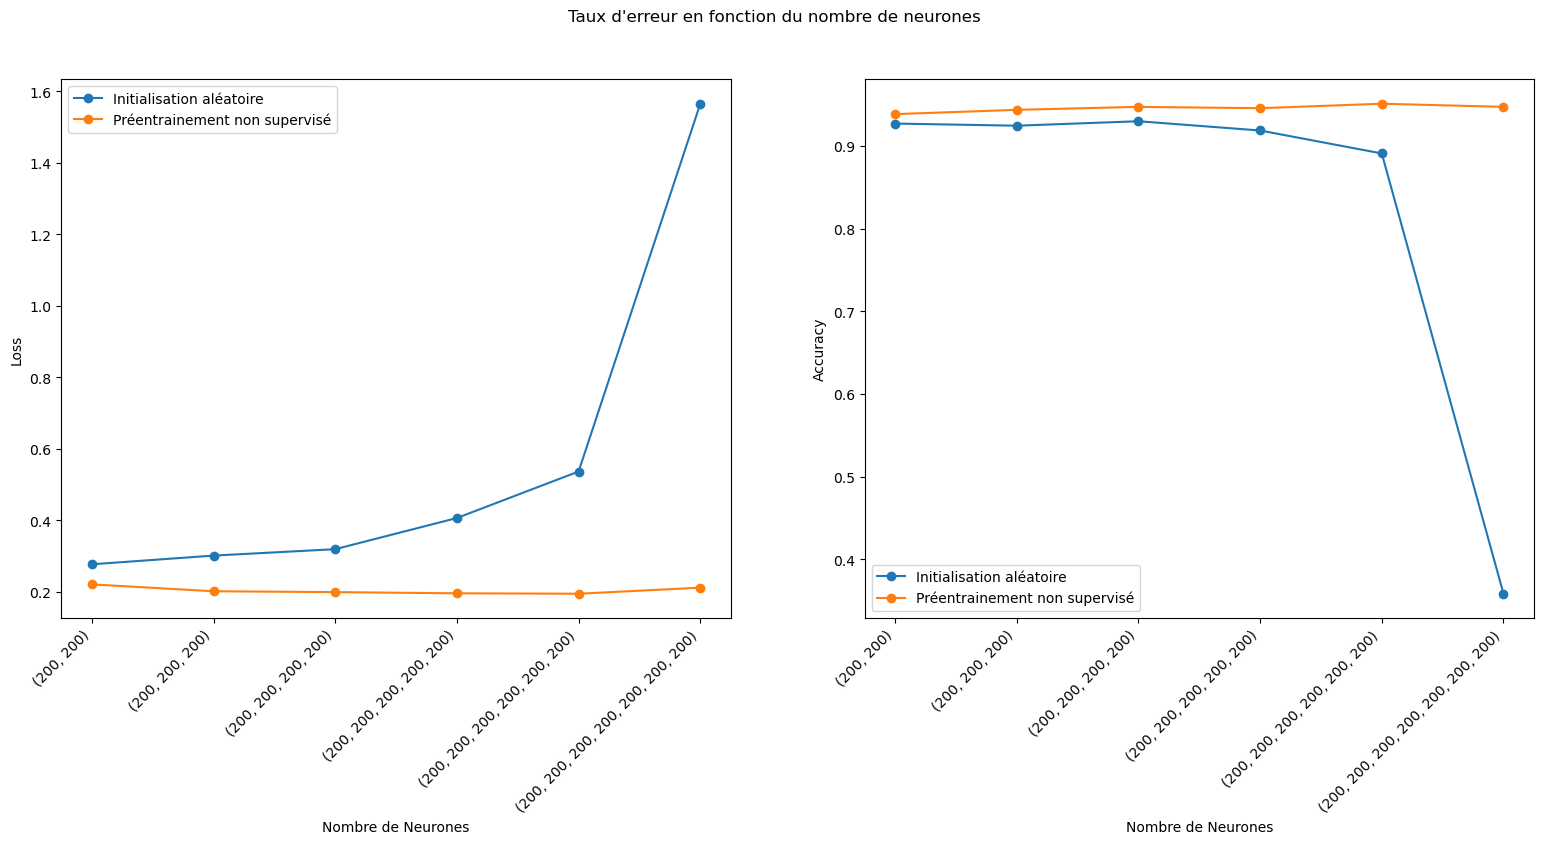

In [10]:
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de neurones")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


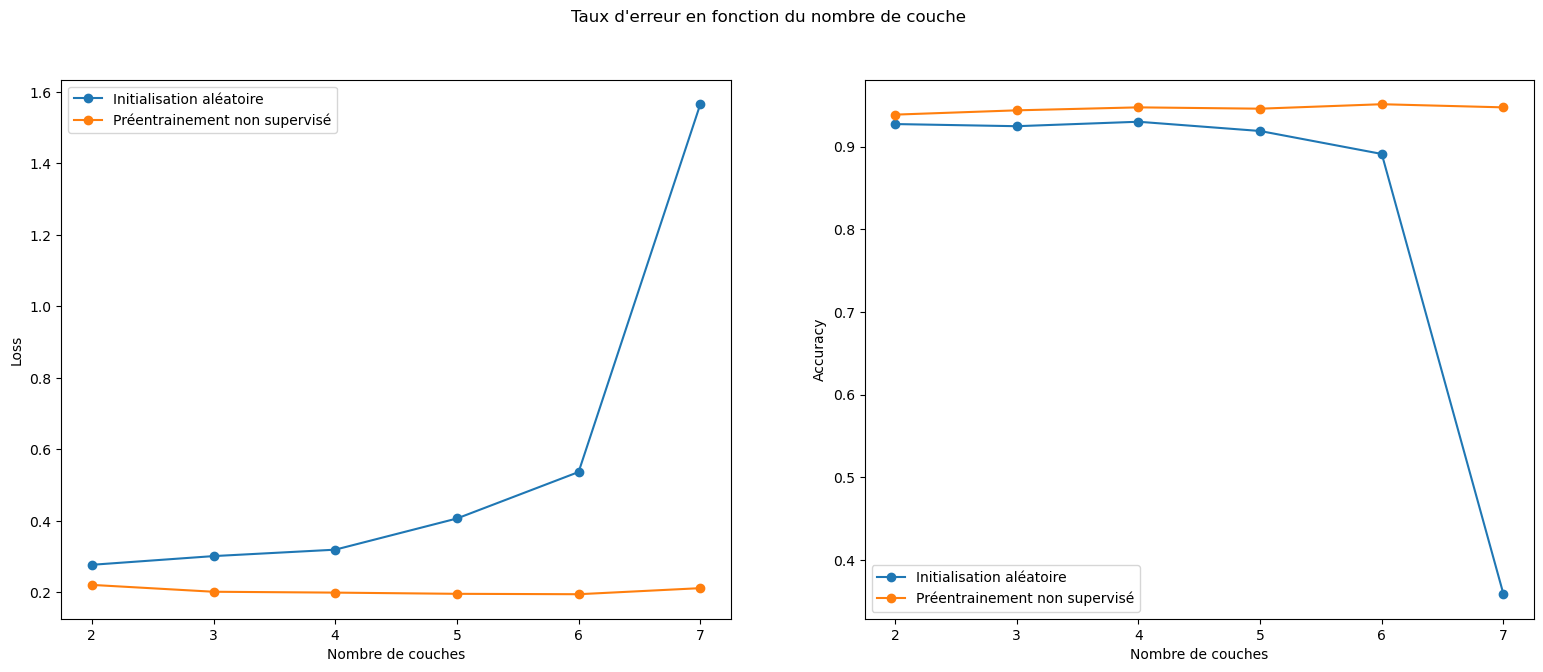

In [11]:
X_range = [len(x) for x in hidden_layer_units]

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de couche  ")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de couches")
axs[0].set_ylabel("Loss")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de couches")
axs[1].set_ylabel("Accuracy")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE NEURONES

In [12]:
# Load MNIST dataset
X_train, X_test, y_train, y_test = get_mnist(train_size=50000, test_size=20000)

# Define hidden layer unit configurations
hidden_layer_units = [(200, 200), (300, 300), (400, 400), (500, 500), (600, 600), (700, 700)]

# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []


# Loop through each hidden layer configuration
for hidden_units in hidden_layer_units:
    print(f"hidden_units : {hidden_units}")
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)

hidden_units : (200, 200)


Training RMB: 100%|██████████| 100/100 [10:19<00:00,  6.19s/it, loss pretraining=0.103]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [20:15<00:00,  6.08s/it, loss retropagation=0.00291]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [18:43<00:00,  5.62s/it, loss retropagation=0.0133]


Test model pretrain =====================================
Test loss: 0.09380152065597415, Acc. %: 97.33000000000001%
Test model random =====================================
Test loss: 0.10367979593475384, Acc. %: 97.315%
hidden_units : (300, 300)


Training RMB: 100%|██████████| 100/100 [13:57<00:00,  8.38s/it, loss pretraining=0.11]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [27:08<00:00,  8.14s/it, loss retropagation=0.00281]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [25:20<00:00,  7.60s/it, loss retropagation=0.0084] 


Test model pretrain =====================================
Test loss: 0.0873087946163328, Acc. %: 97.52499999999999%
Test model random =====================================
Test loss: 0.10713270270385633, Acc. %: 97.26%
hidden_units : (400, 400)


Training RMB: 100%|██████████| 100/100 [20:34<00:00, 12.35s/it, loss pretraining=0.118]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [36:59<00:00, 11.10s/it, loss retropagation=0.00278]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [34:06<00:00, 10.23s/it, loss retropagation=0.00623]


Test model pretrain =====================================
Test loss: 0.07812853824734355, Acc. %: 97.795%
Test model random =====================================
Test loss: 0.10480360302939125, Acc. %: 97.345%
hidden_units : (500, 500)


Training RMB: 100%|██████████| 100/100 [23:22<00:00, 14.03s/it, loss pretraining=0.122]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [42:25<00:00, 12.73s/it, loss retropagation=0.00275]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [41:22<00:00, 12.41s/it, loss retropagation=0.00493]


Test model pretrain =====================================
Test loss: 0.07480118989858722, Acc. %: 97.81%
Test model random =====================================
Test loss: 0.10322685490261352, Acc. %: 97.44500000000001%
hidden_units : (600, 600)


Training RMB: 100%|██████████| 100/100 [28:36<00:00, 17.17s/it, loss pretraining=0.125]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [52:13<00:00, 15.67s/it, loss retropagation=0.00278]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [46:55<00:00, 14.08s/it, loss retropagation=0.0041] 


Test model pretrain =====================================
Test loss: 0.07099851337708854, Acc. %: 97.895%
Test model random =====================================
Test loss: 0.10451857380608626, Acc. %: 97.37%
hidden_units : (700, 700)


Training RMB: 100%|██████████| 100/100 [32:53<00:00, 19.73s/it, loss pretraining=0.127]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [58:14<00:00, 17.47s/it, loss retropagation=0.00275]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [51:12<00:00, 15.36s/it, loss retropagation=0.00374]


Test model pretrain =====================================
Test loss: 0.07229069986856027, Acc. %: 97.88%
Test model random =====================================
Test loss: 0.10113264017011438, Acc. %: 97.44%


In [13]:
import pandas as pd

df = pd.DataFrame(result, index=[f"hidden_units_{i+1}" for i in range(len(hidden_layer_units))])
df.head()
#df.to_csv("result_couches.csv")

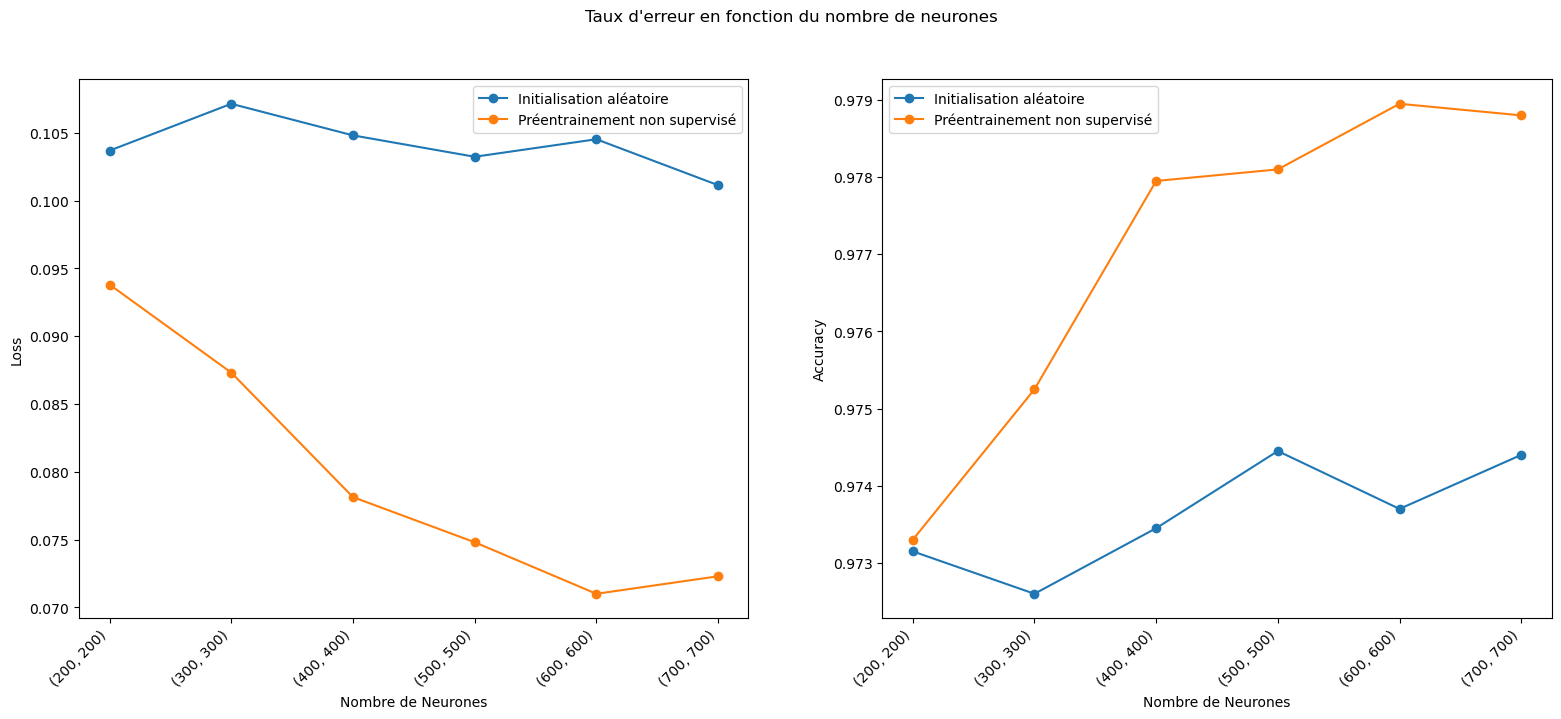

In [14]:
# Plot the result
X_range = range(len(hidden_layer_units))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de neurones")

axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre de Neurones")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre de Neurones")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(hidden_layer_units, rotation=45, ha="right")
axs[1].legend()

plt.show()


## TAUX D'ERREUR EN FONCTION DU NOMBRE DE DONNEES D'APPRENTISSAGE

In [1]:
import pandas as pd

In [12]:
num_epochs_pretraining = 100
num_epochs_training = 200

# Set learning rate
learning_rate = 0.1

# Set batch size
batch_size = 100

# Set input dimension
input_dim = 28*28

# Set number of classes
num_classes = y_train.shape[1]

In [13]:
# Initialize variables
hidden_units = (200, 200)
number_of_examples = [1000, 3000, 5000, 7000, 10000]
# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Train DNN for different number of examples
for number in number_of_examples:
    print(f"number of examples : {number}")
    # Load MNIST digits data
    X_train, X_test, y_train, y_test  = get_mnist(train_size=number, test_size=10000)
    
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)


number of examples : 1000


Training RMB: 100%|██████████| 100/100 [00:11<00:00,  8.94it/s, loss pretraining=0.138]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [00:22<00:00,  8.77it/s, loss retropagation=0.136]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [00:20<00:00,  9.88it/s, loss retropagation=0.107]


Test model pretrain =====================================
Test loss: 0.37877747982635585, Acc. %: 88.29%
Test model random =====================================
Test loss: 0.45709444940675215, Acc. %: 85.92999999999999%
number of examples : 3000


Training RMB: 100%|██████████| 100/100 [00:33<00:00,  3.00it/s, loss pretraining=0.119]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [01:09<00:00,  2.87it/s, loss retropagation=0.0587]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [01:02<00:00,  3.22it/s, loss retropagation=0.055] 


Test model pretrain =====================================
Test loss: 0.28135067742331693, Acc. %: 91.79%
Test model random =====================================
Test loss: 0.39008482146730983, Acc. %: 89.42%
number of examples : 5000


Training RMB: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s, loss pretraining=0.114]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [01:56<00:00,  1.71it/s, loss retropagation=0.0401]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [01:44<00:00,  1.92it/s, loss retropagation=0.0484]


Test model pretrain =====================================
Test loss: 0.2548406686481002, Acc. %: 92.57%
Test model random =====================================
Test loss: 0.35382388640194457, Acc. %: 90.18%
number of examples : 7000


Training RMB: 100%|██████████| 100/100 [01:15<00:00,  1.32it/s, loss pretraining=0.11]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [02:38<00:00,  1.26it/s, loss retropagation=0.0295]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [02:25<00:00,  1.38it/s, loss retropagation=0.0401]


Test model pretrain =====================================
Test loss: 0.23324678713797303, Acc. %: 93.16%
Test model random =====================================
Test loss: 0.33299565338069204, Acc. %: 91.01%
number of examples : 10000


Training RMB: 100%|██████████| 100/100 [01:47<00:00,  1.08s/it, loss pretraining=0.11]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [03:43<00:00,  1.12s/it, loss retropagation=0.0214]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [03:22<00:00,  1.01s/it, loss retropagation=0.0324]


Test model pretrain =====================================
Test loss: 0.19546235760359565, Acc. %: 94.48%
Test model random =====================================
Test loss: 0.2723745744289134, Acc. %: 92.69%


In [16]:
# Initialize variables
hidden_units = (200, 200)
number_of_examples = [30000,60000]
# Initialize empty lists to store training history for each configuration
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

# Train DNN for different number of examples
for number in number_of_examples:
    print(f"number of examples : {number}")
    # Load MNIST digits data
    X_train, X_test, y_train, y_test  = get_mnist(train_size=number, test_size=10000)
    
    # Initialize DNN with given input dimension, hidden layer units, and number of classes at random
    dnn_random = init_DNN(input_dim, hidden_units, num_classes)
    
    # Pretrain DNN with given number of epochs, learning rate, and batch size
    dnn_pretrain = pretrain_DNN(init_DNN(input_dim, hidden_units, num_classes), X_train, epochs=num_epochs_pretraining, learning_rate=learning_rate, batch_size=batch_size)
    
    # Fine tune DNN random and pretrain with given number of epochs, learning rate, and batch size, and store training history
    print("Retropagation model random =====================================")
    dnn_random_tune, train_loss = retropropagation(dnn_random, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    print("Retropagation model pretrain =====================================")
    dnn_pretrain_tune, train_loss = retropropagation(dnn_pretrain, epochs=num_epochs_training, learning_rate=learning_rate, batch_size=batch_size, X=X_train, y=y_train)
    
    # Compute test loss and accuracy for each case   
    print("Test model pretrain =====================================")
    test_loss_pretrain, acc_test_pretrain = test_DNN(dnn_pretrain_tune, X_test, y_test)
    print("Test model random =====================================")
    test_loss_random, acc_test_random = test_DNN(dnn_random_tune, X_test, y_test)
    
    # Store the result
    result["random_loss"].append(test_loss_random)
    result["pretrain_loss"].append(test_loss_pretrain)
    result["random_acc"].append(acc_test_random)
    result["pretrain_acc"].append(acc_test_pretrain)


number of examples : 30000


Training RMB: 100%|██████████| 100/100 [05:22<00:00,  3.23s/it, loss pretraining=0.107]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [11:07<00:00,  3.34s/it, loss retropagation=0.00501]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [10:08<00:00,  3.04s/it, loss retropagation=0.0172]


Test model pretrain =====================================
Test loss: 0.1303058906318957, Acc. %: 96.5%
Test model random =====================================
Test loss: 0.15371131887189327, Acc. %: 96.21%
number of examples : 60000


Training RMB: 100%|██████████| 100/100 [10:31<00:00,  6.31s/it, loss pretraining=0.103]


Retropagation model random =====================================


Retropopagation: 100%|██████████| 200/200 [22:02<00:00,  6.61s/it, loss retropagation=0.00252]


Retropagation model pretrain =====================================


Retropopagation: 100%|██████████| 200/200 [20:12<00:00,  6.06s/it, loss retropagation=0.0132]


Test model pretrain =====================================
Test loss: 0.08250662458197865, Acc. %: 97.63%
Test model random =====================================
Test loss: 0.0923416693257145, Acc. %: 97.63%


In [44]:
df1 = pd.read_csv("result_app10.csv")
df2 = pd.read_csv("result_app20.csv")
df1["Unnamed: 0"] = [1000,3000,5000,7000,10000]
df2["Unnamed: 0"] = [30000,60000]
df_tot = pd.concat([df1,df2], axis=0)
df_tot.set_index("Unnamed: 0", inplace=True)

In [131]:
result = {}

In [132]:
result = {}
result["random_loss"] = []
result["pretrain_loss"] = []
result["random_acc"] = []
result["pretrain_acc"] = []

In [133]:
for i in range(7) :
    result["random_loss"].append(df_tot["random_loss"].values[i])
    result["pretrain_loss"].append(df_tot["pretrain_loss"].values[i])
    result["random_acc"].append(df_tot["random_acc"].values[i])
    result["pretrain_acc"].append(df_tot["pretrain_acc"].values[i])
    

In [134]:
result

{'random_loss': [0.4570944494067521,
  0.3900848214673098,
  0.3538238864019445,
  0.332995653380692,
  0.2723745744289134,
  0.1537113188718932,
  0.0923416693257145],
 'pretrain_loss': [0.3787774798263558,
  0.2813506774233169,
  0.2548406686481002,
  0.233246787137973,
  0.1954623576035956,
  0.1303058906318957,
  0.0825066245819786],
 'random_acc': [0.8593, 0.8942, 0.9018, 0.9101, 0.9269, 0.9621, 0.9763],
 'pretrain_acc': [0.8829, 0.9179, 0.9257, 0.9316, 0.9448, 0.965, 0.9763]}

In [135]:
number_of_examples = [1000, 3000, 5000, 7000, 10000, 30000, 60000]

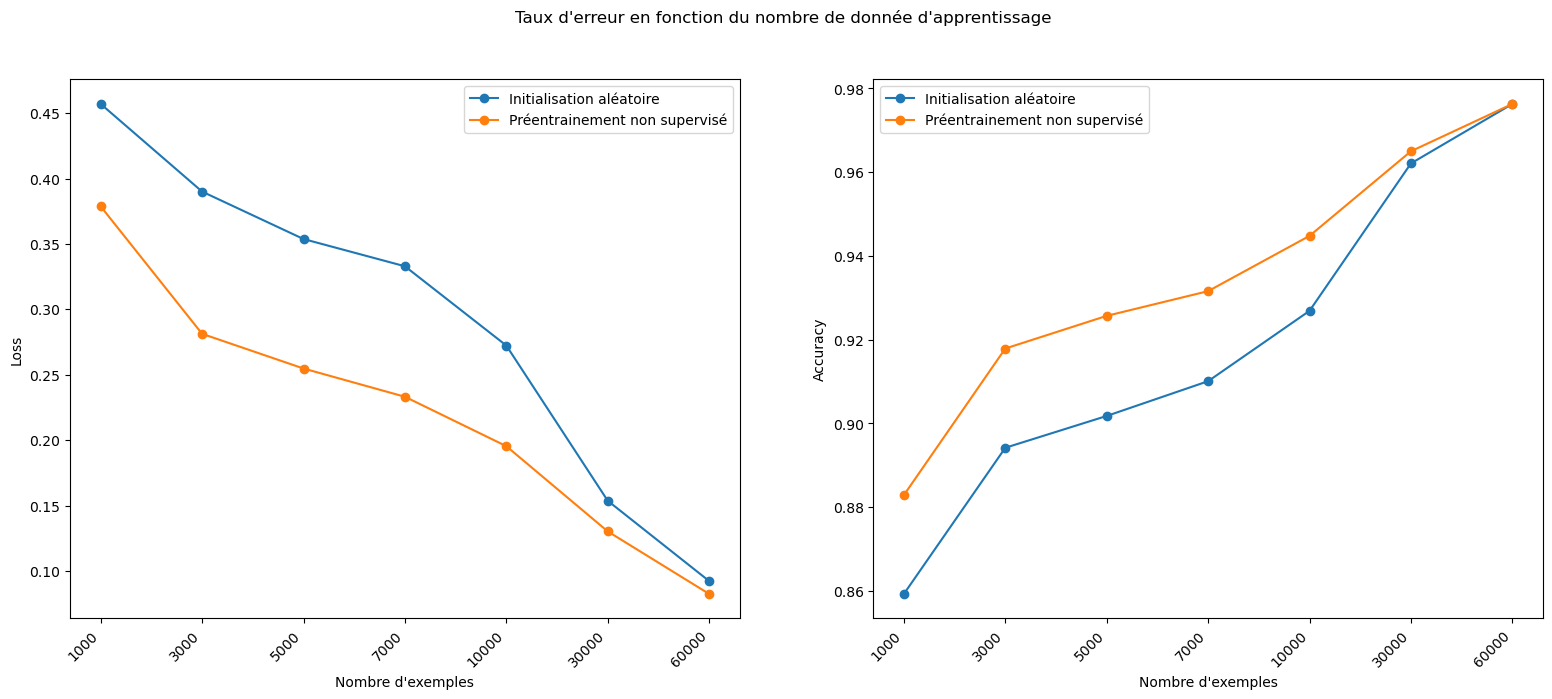

In [136]:
# Plot the result
X_range = range(len(number_of_examples))

fig, axs = plt.subplots(1, 2, figsize=(19,7))
fig.suptitle("Taux d'erreur en fonction du nombre de donnée d'apprentissage")


axs[0].plot(X_range, result["random_loss"],"o-", label='Initialisation aléatoire')
axs[0].plot(X_range, result["pretrain_loss"], "o-", label = "Préentrainement non supervisé")
axs[0].set_xlabel("Nombre d'exemples")
axs[0].set_ylabel("Loss")
axs[0].set_xticks(X_range)
axs[0].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[0].legend()

axs[1].plot(X_range, result["random_acc"], "o-", label='Initialisation aléatoire')
axs[1].plot(X_range, result["pretrain_acc"], "o-", label = "Préentrainement non supervisé")
axs[1].set_xlabel("Nombre d'exemples")
axs[1].set_ylabel("Accuracy")
axs[1].set_xticks(X_range)
axs[1].set_xticklabels(number_of_examples, rotation=45, ha="right")
axs[1].legend()

plt.show()
